<div align = "center"><img src = "https://upload.wikimedia.org/wikipedia/en/thumb/3/3b/Stony_Brook_U_logo_vertical.svg/1024px-Stony_Brook_U_logo_vertical.svg.png" width ="300"></div>

# <div align="center"> **AMS 512 Notebook Project: Mathematica to Python** </div>

## <div align="center"> **Mean-Variance Optimization** </div>

### <div align = "center"> **Authors:** *Ainasse, El Mehdi and Lize, Matheus Loss* </div>

# **Initial set-up**

In [1]:
import pandas as pd
import numpy as np
import math
import os
import scipy.stats as stats
import sys
import random
import matplotlib.pyplot as plt
import seaborn as sns


# **Disclaimer**

All present contents are mainly excerpts from the original notebook by Prof. Robert J. Frey. In particular, textual contents are directly quoted and/or copy-pasted while the coding components have been re-adapted from Mathematica to Python.

#**Quadratic Programming**

No short postion: 
* $\min \left\{ \frac{1}{2} x^{T}\Sigma x - \lambda \mu^{T} x \big| \; \mathbf{1} x^{T}=1 \wedge x \ge 0 \right\} $ 

Short postion:
*  $\min \left\{ \frac{1}{2} x^{T}\Sigma x - \lambda \mu^{T} x \big| \; \mathbf{1} x^{T}=1  \right\} $ 

In the [cvxopt](https://cvxopt.org/userguide/coneprog.html#quadratic-programming) library, we solve the problem
$$ \min \left(  \frac{1}{2} x^{T} P x + q^{T} x \right),$$
subject to the constraints
$$Gx \le h \text{ and } Ax = b.$$

First, note that all entries must be float numbers. So in our case: 

* Convariant matrix:  $P_{n\times n}= \Sigma_{n\times n}$.
  * Syntax: <code> P = matrix( [ [Sigma[1,1],... ,Sigma[1,n]],[Sigma[2,1],... ,Sigma[2,n]],... , [Sigma[n,1],... ,Sigma[n,n]] ])</code>.
* Assets mean: $q = -\lambda \mu$.
  *  Syntax:   <code>matrix(-\lambda [mu[1],... ,mu[n]])</code>.
* Sum of the weights ($x$) : $A_{1\times n} = [[1.0,1.0,\dots,1.0 ]]$. 
 * Syntax: <code>A = matrix(1.0,(1,n))</code> or <code>A = matrix(np.ones(1,n))</code>.
*  $b$ in this case is just a constant.
  * Syntax: <code> matrix(b) </code> 
* No short position: $G_{n\times n} = - \mathbf{1}_{n\times n}$ and $h_{n\times 1}=0$ 
 * Syntax: <code>G = matrix (-np.Identity(n))</code> and <code>h = matrix( np.zeros(n,1))</code>. 
 * For a general $G,h$, the syntax is the following.
  * <code>G = matrix([ [G[1,1],... ,G[1,n]],[G[2,1],... ,G[2,n]],..., [G[n,1]],... ,G[n,n]] ])</code> and <code> h = matrix ([h[1],...,h[n]],(n,1))</code>.

In [2]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

ModuleNotFoundError: No module named 'cvxopt'

In [ ]:
cvxopt_matrix(mnCov)
print(mnCov)

[[0.0049  0.00252 0.0042 ]
 [0.00252 0.0081  0.0036 ]
 [0.0042  0.0036  0.01   ]]


In [ ]:
mnCov

array([[0.0049 , 0.00252, 0.0042 ],
       [0.00252, 0.0081 , 0.0036 ],
       [0.0042 , 0.0036 , 0.01   ]])

In [ ]:
def quadraticProgramming(CovMatrix,Mean,Target,*args,short=True):
  # Set up
  dim = len(Mean)
  # Use the cvxopt_matrix() to transform all the input arrays. 
  P = cvxopt_matrix(CovMatrix)
  q= cvxopt_matrix(-Target*Mean)
  # The defaut value for the sum of x is 1 :  
  if not args:
    A=cvxopt_matrix(1.0,(1,dim))
    b=cvxopt_matrix(1.0)  
  else:
    A = cvxopt_matrix(args[0])
    b = cvxopt_matrix(args[1],(dim,1))
  if short:  
    G =cvxopt_matrix(-np.identity(dim))
    h =cvxopt_matrix(0.0,(dim,1))

  return cvxopt_solvers.qp(P, q, G, h, A,b)

In [ ]:

AA = np.array([1.,1.,1.]).reshape(1,-1)
hh = np.array([0.,0.,0.])
GG= -np.identity(3)

In [ ]:
sol1 =quadraticProgramming(mnCov,vnMean,0.05)

     pcost       dcost       gap    pres   dres
 0: -1.4091e-03 -1.0017e+00  1e+00  4e-16  2e+00
 1: -1.4092e-03 -1.1682e-02  1e-02  2e-16  2e-02
 2: -1.4193e-03 -1.7215e-03  3e-04  8e-17  7e-04
 3: -1.4408e-03 -1.4609e-03  2e-05  2e-16  2e-05
 4: -1.4414e-03 -1.4417e-03  3e-07  1e-16  2e-07
 5: -1.4414e-03 -1.4414e-03  3e-09  8e-17  2e-09
Optimal solution found.


In [ ]:
print(quadraticProgramming(mnCov,vnMean,0.05)['x'])

     pcost       dcost       gap    pres   dres
 0: -1.4091e-03 -1.0017e+00  1e+00  4e-16  2e+00
 1: -1.4092e-03 -1.1682e-02  1e-02  2e-16  2e-02
 2: -1.4193e-03 -1.7215e-03  3e-04  8e-17  7e-04
 3: -1.4408e-03 -1.4609e-03  2e-05  2e-16  2e-05
 4: -1.4414e-03 -1.4417e-03  3e-07  1e-16  2e-07
 5: -1.4414e-03 -1.4414e-03  3e-09  8e-17  2e-09
Optimal solution found.
[ 2.16e-01]
[ 4.02e-01]
[ 3.82e-01]



In [ ]:
portNumWeight = [np.array(quadraticProgramming(mnCov,vnMean,num)['x']) for num in np.arange(0.0,0.1,0.01)];

     pcost       dcost       gap    pres   dres
 0:  2.4223e-03 -9.9855e-01  1e+00  2e-16  2e+00
 1:  2.4209e-03 -8.5468e-03  1e-02  1e-16  3e-02
 2:  2.3274e-03  1.4834e-03  8e-04  1e-16  2e-03
 3:  2.1197e-03  1.9865e-03  1e-04  2e-16  1e-18
 4:  2.0949e-03  2.0829e-03  1e-05  0e+00  5e-19
 5:  2.0920e-03  2.0906e-03  1e-06  1e-16  6e-19
 6:  2.0919e-03  2.0918e-03  5e-08  3e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6565e-03 -9.9905e-01  1e+00  3e-16  2e+00
 1:  1.6557e-03 -9.0480e-03  1e-02  2e-16  2e-02
 2:  1.6002e-03  9.4825e-04  7e-04  8e-17  1e-03
 3:  1.4786e-03  1.3956e-03  8e-05  6e-17  4e-19
 4:  1.4695e-03  1.4639e-03  6e-06  6e-17  6e-19
 5:  1.4693e-03  1.4692e-03  8e-08  2e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.9051e-04 -9.9955e-01  1e+00  2e-16  2e+00
 1:  8.9011e-04 -9.5492e-03  1e-02  8e-17  2e-02
 2:  8.6274e-04  4.1072e-04  5e-04  2e-16  1e-03
 3:  8.0652e-04  7.6747e

In [ ]:
portNumWeight[1]

array([[0.49410891],
       [0.33649095],
       [0.16940014]])

In [ ]:
portNum=np.array([ xPortSdevMean(np.transpose(i),vnMean,mnCov) for i in portNumWeight])

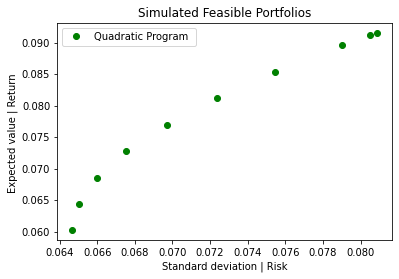

In [ ]:
plt.plot(portNum[:,1],portNum[:,0],'go',label='Quadratic Program ')
plt.ylabel('Expected value | Return ',)
plt.xlabel('Standard deviation | Risk')
plt.title('Simulated Feasible Portfolios')
plt.legend()

# **Reading Finance data from Yahoo**

In [ ]:
# For time stamps 
from datetime import datetime
from pandas_datareader import data, wb

# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','SNP']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


# #For loop for grabing yahoo finance data and setting as a dataframe
# panel_data = data.DataReader('INPX', 'yahoo', start, end)

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [ ]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,291.861746,284.903413,287.969881,288.781468,3.593084e+07,287.279108
std,56.288910,54.779926,55.463582,55.754593,1.726080e+07,56.197139
min,202.050003,199.149994,199.619995,200.479996,1.165440e+07,198.510406
25%,249.937500,241.662498,247.014996,246.315002,2.439980e+07,244.351742
50%,285.360001,278.679993,281.449997,283.070007,3.119720e+07,281.797729
75%,322.842491,316.692490,319.437500,319.230011,4.167190e+07,318.209122
max,457.649994,441.170013,452.820007,455.609985,1.067212e+08,454.790009


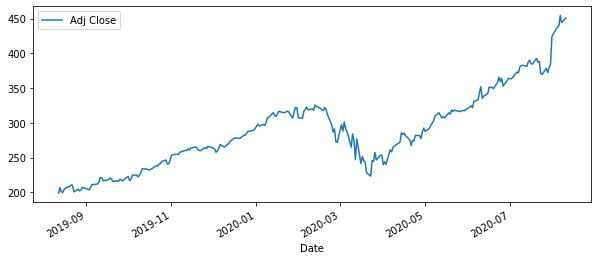

In [ ]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

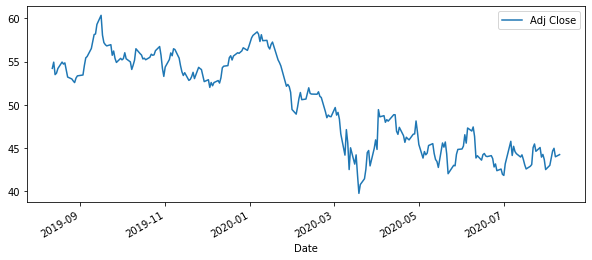

In [ ]:
# Let's see a historical view of the closing price
SNP['Adj Close'].plot(legend=True,figsize=(10,4))

# **Markowitz's Modern Portfolio Theory: Mean-Variance Portfolios**

> Modern Portfolio Theory or MPT is widely used as the basis for constructing portfolios. It assumes that asset returns can be modeled using a multivariate Normal distribution and further assumes that risk is measured by a portfolio's variance (or equivalently standard deviation) of return and reward is measured by a portfolio's expected value of return.\
\
Despite concerns about the reasonableness of these assumptions, MPT provides a framework for selecting portfolios based on a trade-off of risk and reward. MPT leads an investor to allocate capital based on the overall characteristics of the portfolio rather than allocating capital to individual assets on a case-by-case basis without considering how the performance of individual assets may interact.\
\
See http://en.wikipedia.org/wiki/Modern_portfolio_theory.




## **The Markowitz model** ##
### *Portfolio Mean and Variance*
>Portfolio Mean:
$$\mu_P = \mathbf{\mu}^{T}\mathbf{x}.$$
Portfolio Variance:
$$\sigma_P^2 = \mathbf{x}^{T} \mathbf{\Sigma} \mathbf{x}.$$

### *Balacing Risk & Reward*
>Trade-off risk and reward. In what follows the set $\mathcal{S}$ is typically convex and frequently expressed as a system of linear constraints. The general form is the quadratic program:
$$\min\left\{\dfrac{1}{2}\mathbf{x}^T\mathbf{\Sigma}\mathbf{x}-\lambda\mathbf{\mu}^T\mathbf{x} \, | \, \mathbf{x} \in \mathcal{S}\right\}, 0 \leq \lambda \leq +\infty.$$
\
Minimum variance portfolio ($\lambda \rightarrow 0$):
$$\min\left\{\dfrac{1}{2}\mathbf{x}^T\mathbf{\Sigma}\mathbf{x} \, | \, \mathbf{x} \in \mathcal{S}\right\}.$$
\
Maximum return portfolio, which simplifies to a linear program ($\lambda \rightarrow +\infty$):
$$\min\left\{-\mathbf{\mu}^T\mathbf{x} \, | \, \mathbf{x} \in \mathcal{S}\right\}.$$
\
Minimize risk at target rate of return:
$$\min\left\{\dfrac{1}{2}\mathbf{x}^T\mathbf{\Sigma}\mathbf{x} \, | \, \mathbf{\mu}^T\mathbf{x} \geq \tau \wedge \mathbf{x} \in \mathcal{S}\right\}.$$
\
Maximize return at a target level of risk:
$$\max\left\{\mathbf{\mu}^T\mathbf{x} \, | \, \mathbf{x}^T\mathbf{\Sigma}\mathbf{x} = q \wedge \mathbf{x} \in \mathcal{S}\right\}.$$

## **Monte Carlo Simulation**
>Consider the case where the capital is assumed to be equal to 1 (*i.e.*, $\mathbf{x}$ represents proportional allocation) and no short positions are allowed.
$$\mathcal{P}_{\mathrm{Feasible}} = \left\{\left\{\mathbf{x}^T\mathbf{\Sigma}\mathbf{x},\mathbf{\mu}^T\mathbf{x}\right\} \, | \, \mathbf{x}^T\mathbf{1} = 1 \wedge \mathbf{x} \geq \mathbf{0}\right\}.$$
The strategy is to simulate a large number of feasible portfolios and examine their behavior in $\{\sigma^2,\mu\}$-space.\
A covariance matrix can be constructed by specifying the correlation and volatility separately. The strategy for this is based on the following:
$$\sigma_{x,y} = \rho_{x,y}\sigma_x\sigma_y.$$

In [ ]:
vnMean = np.array([0.05, 0.08, 0.10])
vnSigma = np.array([0.07, 0.09, 0.10])
mnCor = np.array([[1, 0.4, 0.6], [0.4, 1, 0.4], [0.6, 0.4, 1]])
mnCov = np.kron(vnSigma,vnSigma).reshape(3,3)*np.array(mnCor)
print("\u03BC = ", np.array(vnMean).reshape(-1,1))
print("\u03C3 = ", np.array(vnSigma).reshape(-1,1))
print("C = ", mnCor)
print("\u03A3 = ", mnCov)

μ =  [[0.05]
 [0.08]
 [0.1 ]]
σ =  [[0.07]
 [0.09]
 [0.1 ]]
C =  [[1.  0.4 0.6]
 [0.4 1.  0.4]
 [0.6 0.4 1. ]]
Σ =  [[0.0049  0.00252 0.0042 ]
 [0.00252 0.0081  0.0036 ]
 [0.0042  0.0036  0.01   ]]


>In generating random feasible portfolios, we will assume that short positions are not permitted, *i.e.*, $x_i \geq 0$. The simulation will produce 10,000 cases for analysis.\
\
A straightforward way to sample from the set of feasible portfolios is:

[0.920246751328949, 0.7224665328498063]
[0.5601992509538934, 0.4398007490461066]


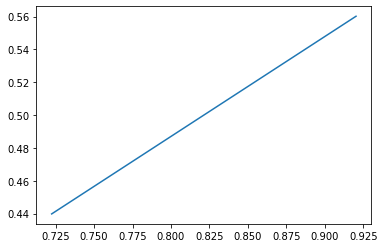

In [ ]:
list1 = np.random.uniform(0,1,2).tolist()
list2 = [i/sum(list1) for i in list1]
print(list1)
print(list2)
plt.plot(list1,list2)
plt.show()

In [ ]:
NumberOfAssets = len(vnMean)
NumberOfSamples = 100000

def NormalizedList(n):
  # returns a list of n  normalized numbers generated from a normal distribution 
  # This are the weights for the portifolio 
  List1= np.random.uniform(0,1,n)
  NormalizedList= [i/sum(List1) for i in List1]
  return NormalizedList

def xRandomPortfolio(nAssets,nSample):
  # Here, we generate -nSamples-  of portifolio weights given by NormalizedList
  return np.array([NormalizedList(nAssets) for i in range(nSample)])

def xPortSdevMean(PortWeight,AssetsMean,AssetsSigma):
  # The mean of the portifolio.  
  # Mean.x:
  PortMean = AssetsMean.dot(PortWeight.transpose())
  # Standart deviation for the portifolio
  # sqrt (x.CovarianceMatrix.x) :
  PortStandDev=np.sqrt(PortWeight.dot(PortWeight.dot(AssetsSigma).transpose()))

  return [PortMean, PortStandDev]

def EffiPortFilter(data):
  #Sort the np array data by the standart deviation columm 
  DataSort =  data[np.argsort(data[:,1])]
    #  np.argsort(data[:,1])
    # Select the portifolio -i- only if it has a return -i[0]-
    # bigger than it's priviews
  lis =[]
  lis.append(DataSort[0])
  for i in DataSort:
    if i[0] > lis[len(lis) -1][0]:
      lis.append(i)
  return np.array(lis)

# Maybe change the fucntion to get just one Weight at the time.
# This function return a list of all the weights in for the Pareto optimal portifolio.
def EffiPortWeights(Portlist, EffPortlist,WeightList):

  filter = [ (Portlist[:,0]==Element[0]) & (Portlist[:,1]==Element[1]) for Element in EffPortlist ]
  return [ WeightList[i] for i in filter];


Generates -NumberOfSamples- of portifolio weights:

In [ ]:
x = xRandomPortfolio(3,NumberOfSamples)

In [ ]:
x[0]

array([0.27262668, 0.35709274, 0.37028058])

Computes the pair (Portifolion Mean, Portifolio Std ) for each portifolio generated 

In [ ]:
PortList=np.array([xPortSdevMean(i,vnMean,mnCov) for i in x ])

In [ ]:
PortList

array([[0.07922681, 0.07112515],
       [0.08524495, 0.07914508],
       [0.08020735, 0.07460425],
       ...,
       [0.07733561, 0.07035215],
       [0.07185362, 0.07049442],
       [0.06345412, 0.06505879]])

Select the pareto optimal portifolio

In [ ]:
EffiPortList= EffiPortFilter(PortList)

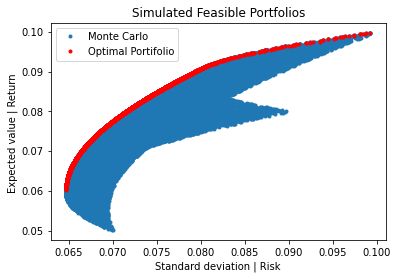

In [ ]:
plt.plot(PortList[:,1],PortList[:,0],'.',label='Monte Carlo')
plt.plot(EffiPortList[:,1],EffiPortList[:,0],'r.',label='Optimal Portifolio')
plt.ylabel('Expected value | Return ')
plt.xlabel('Standard deviation | Risk')
plt.title('Simulated Feasible Portfolios')
plt.legend()

In [ ]:
WeightListEffi = EffiPortWeights(PortList,EffiPortList,x)

In [ ]:
WeightListEffi[1]

array([[0.67392617, 0.29234776, 0.03372607]])

# Analytical Solution 


In [ ]:
def xOptimalPortfolio(PortCovar,PortMean,L):

  InverseCovar = np.linalg.inv(PortCovar)
 # InverseCovar.sum() return the sum of all elements = 1T.M.1 
  LagrangeMulti = (1 - L*InverseCovar.dot(PortMean).sum())/ InverseCovar.sum()
  return L* InverseCovar.dot(PortMean) + LagrangeMulti*InverseCovar.dot([1,1,1])


In [ ]:
xOptimalPortfolio(mnCov,vnMean,0.03)

array([0.40134564, 0.35831638, 0.24033798])

In [ ]:
np.linalg.inv(mnCov).dot([1,1,1])

array([162.45039683,  69.99559083,   6.57242063])

In [ ]:
np.linalg.inv(mnCov).dot([1,1,1])

array([162.45039683,  69.99559083,   6.57242063])

In [ ]:
xEffi=[xOptimalPortfolio(mnCov,vnMean,i) for i in np.arange(0,0.1,0.01)]

In [ ]:
PortEffiAnaly=np.array([xPortSdevMean(i,vnMean,mnCov) for i in xEffi])

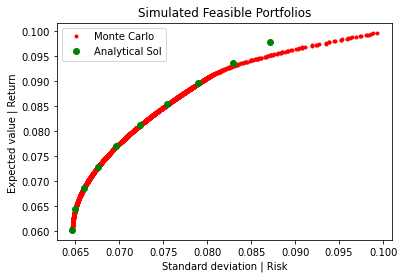

In [ ]:
#plt.plot(PortList[:,1],PortList[:,0],'.')
plt.plot(EffiPortList[:,1],EffiPortList[:,0],'r.',label='Monte Carlo')
plt.plot(PortEffiAnaly[:,1],PortEffiAnaly[:,0],'go',label='Analytical Sol')
plt.ylabel('Expected value | Return ',)
plt.xlabel('Standard deviation | Risk')
plt.title('Simulated Feasible Portfolios')
plt.legend()

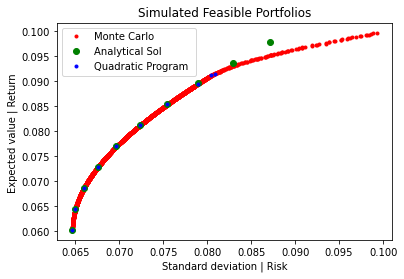

In [ ]:

plt.plot(EffiPortList[:,1],EffiPortList[:,0],'r.',label='Monte Carlo')
plt.plot(PortEffiAnaly[:,1],PortEffiAnaly[:,0],'go',label='Analytical Sol')
plt.plot(portNum[:,1],portNum[:,0],'b.',label='Quadratic Program ')
plt.ylabel('Expected value | Return ',)
plt.xlabel('Standard deviation | Risk')
plt.title('Simulated Feasible Portfolios')
plt.legend()

#A Look at Real Data

Reading  Ficancial data from Yahoo: 

In [ ]:
# For time stamps
from datetime import datetime
from pandas_datareader import data, wb

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(1927,12,29)

# We are going to consider S&P 500 index for this analysis
#snpData = data.DataReader(['sp500'],'fred',start,end)

# We are going to consider S&P 500 index for this analysis
snpData = data.DataReader('^GSPC','yahoo',start,end)


snpData.describe()

,High,Low,Open,Close,Volume,Adj Close
count,23285.000000,23285.000000,23285.000000,23285.000000,2.328500e+04,23285.000000
mean,484.922614,479.070240,482.092216,482.190826,7.633524e+08,482.190826
std,721.092453,713.056473,717.265808,717.365317,1.479115e+09,717.365317
min,4.400000,4.400000,4.400000,4.400000,0.000000e+00,4.400000
25%,23.820000,23.820000,23.820000,23.820000,1.270000e+06,23.820000
50%,100.190002,98.620003,99.400002,99.430000,1.721000e+07,99.430000
75%,833.700012,812.869995,822.099976,825.159973,5.248800e+08,825.159973
max,3588.110107,3535.229980,3564.739990,3580.840088,1.145623e+10,3580.840088


In [ ]:
snpData['Adj Close']

Date
1927-12-30      17.660000
1928-01-03      17.760000
1928-01-04      17.719999
1928-01-05      17.549999
1928-01-06      17.660000
                 ...     
2020-09-04    3426.959961
2020-09-08    3331.840088
2020-09-09    3398.959961
2020-09-10    3339.189941
2020-09-11    3361.510010
Name: Adj Close, Length: 23285, dtype: float64

Transforms the Daily data into Monthly Data: 

In [ ]:
snpDataMonth=snpData.groupby(pd.Grouper(freq='M')).mean()

In [ ]:
snpDataMonth['Adj Close']

Date
1927-12-31      17.660000
1928-01-31      17.520000
1928-02-29      17.324211
1928-03-31      18.233182
1928-04-30      19.371000
                 ...     
2020-05-31    2919.608484
2020-06-30    3104.660933
2020-07-31    3207.619096
2020-08-31    3391.710019
2020-09-30    3427.626251
Freq: M, Name: Adj Close, Length: 1114, dtype: float64

In [ ]:
snpData['Adj Close'][1:22].mean()

17.519999821980793

In [ ]:
snpDataMonth['Adj Close']['2015']

Date
2015-01-31    2028.178510
2015-02-28    2082.195794
2015-03-31    2079.990440
2015-04-30    2094.862839
2015-05-31    2111.943518
2015-06-30    2099.283658
2015-07-31    2094.143627
2015-08-31    2039.866205
2015-09-30    1944.402384
2015-10-31    2024.812716
2015-11-30    2080.616504
2015-12-31    2054.079562
Freq: M, Name: Adj Close, dtype: float64

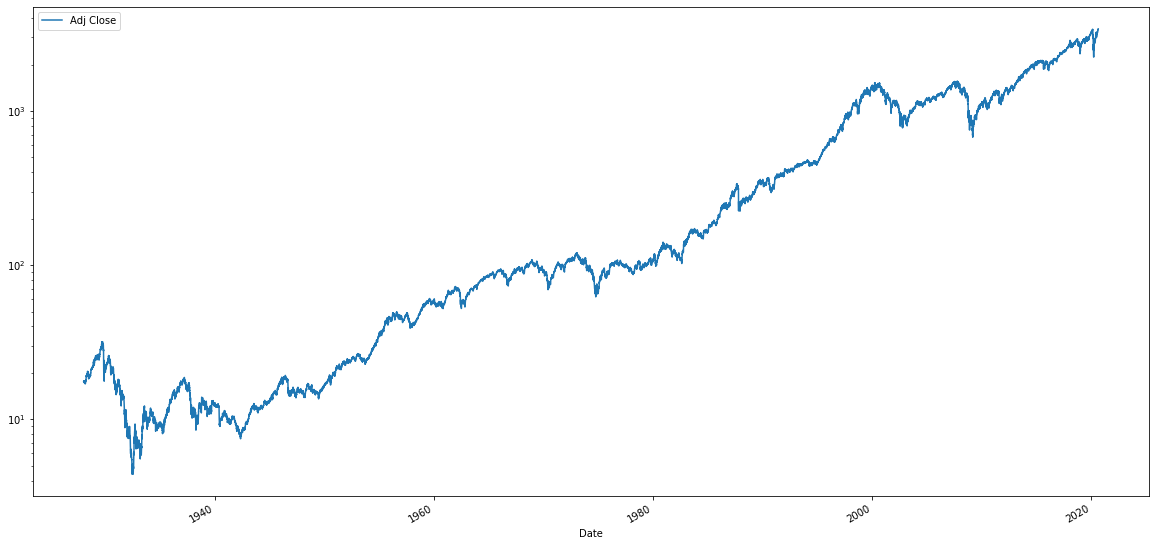

In [ ]:
snpData['Adj Close'].plot(legend=True,figsize=(20,10))
plt.yscale('log')

In [ ]:
snpData['LogReturn']=np.log(snpData['Adj Close'])-np.log(snpData['Adj Close'].shift(1))

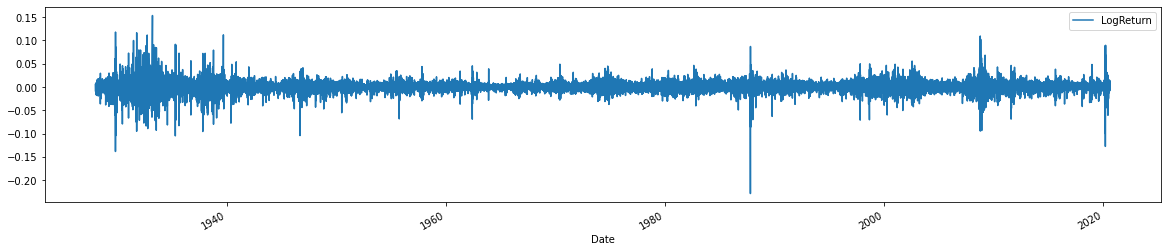

In [ ]:
snpData['LogReturn'].plot(legend=True,figsize=(20,4))

##Exploratory Data Analysis: Local Volatility

In [ ]:
np.mean(snpData['LogReturn'])**2

5.10915336753884e-08

In [ ]:
np.std(snpData['LogReturn'])

0.012017307563555544

In [ ]:
np.mean(snpData['LogReturn']**2)

0.00014446677261076432

In [ ]:
np.sqrt(np.mean(snpData['LogReturn']**2) -np.mean(snpData['LogReturn'])**2)

0.01201730756355553

In [ ]:
np.sqrt(np.mean(snpData['LogReturn']**2))

0.012019433123519774

In [ ]:
np.mean(snpData['LogReturn'])

0.00022603436392590486

In [ ]:
NormalSNP = np.random.normal(np.mean(snpData['LogReturn']),np.std(snpData['LogReturn']))

In [ ]:
SampleSNP = np.array([NormalSNP**2 for i in range(1000) ]).cumsum() ;

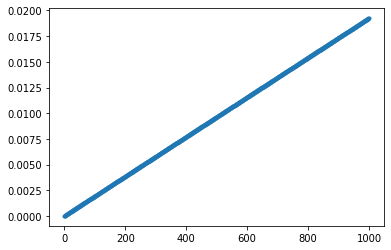

In [ ]:
plt.plot(range(1000),SampleSNP,'.')

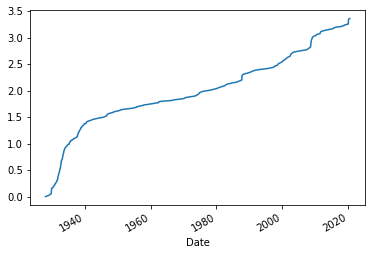

In [ ]:
((snpData['LogReturn'][1:]**2).cumsum()).plot()

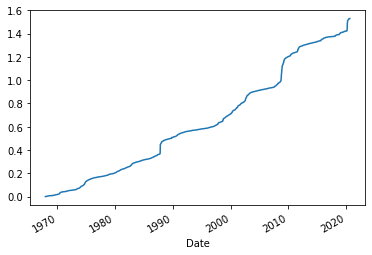

In [ ]:
((snpData['LogReturn'][10000:]**2).cumsum()).plot()

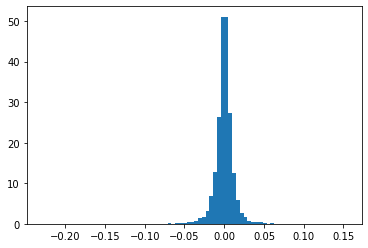

In [ ]:
_, bins, _ = plt.hist(snpData['LogReturn'][1:],bins=80,density=True,)

In [ ]:
bins

array([-0.22899729, -0.22421405, -0.21943082, -0.21464759, -0.20986436,
       -0.20508113, -0.20029789, -0.19551466, -0.19073143, -0.1859482 ,
       -0.18116496, -0.17638173, -0.1715985 , -0.16681527, -0.16203204,
       -0.1572488 , -0.15246557, -0.14768234, -0.14289911, -0.13811587,
       -0.13333264, -0.12854941, -0.12376618, -0.11898295, -0.11419971,
       -0.10941648, -0.10463325, -0.09985002, -0.09506678, -0.09028355,
       -0.08550032, -0.08071709, -0.07593386, -0.07115062, -0.06636739,
       -0.06158416, -0.05680093, -0.0520177 , -0.04723446, -0.04245123,
       -0.037668  , -0.03288477, -0.02810153, -0.0233183 , -0.01853507,
       -0.01375184, -0.00896861, -0.00418537,  0.00059786,  0.00538109,
        0.01016432,  0.01494756,  0.01973079,  0.02451402,  0.02929725,
        0.03408048,  0.03886372,  0.04364695,  0.04843018,  0.05321341,
        0.05799665,  0.06277988,  0.06756311,  0.07234634,  0.07712957,
        0.08191281,  0.08669604,  0.09147927,  0.0962625 ,  0.10

Fit a normal distribution:


x = Bins 
y = NormalPDF(x,mean, std)  

In [ ]:
mu, sigma = stats.norm.fit(snpData['LogReturn'][1:])
best_fit_line = stats.norm.pdf(bins, mu, sigma)

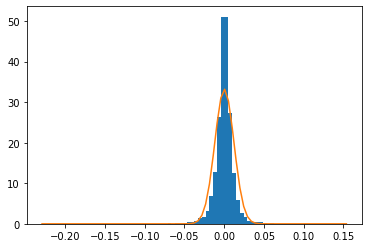

In [ ]:
_, bins, _= plt.hist(snpData['LogReturn'][1:],density=True,bins=80)
plt.plot(bins, best_fit_line)

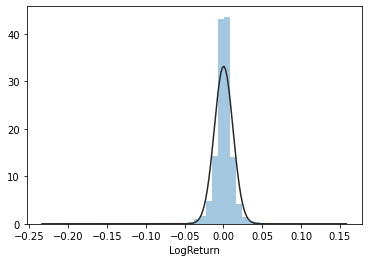

In [ ]:
sns.distplot(snpData['LogReturn'][1:], fit=stats.norm, kde=False)

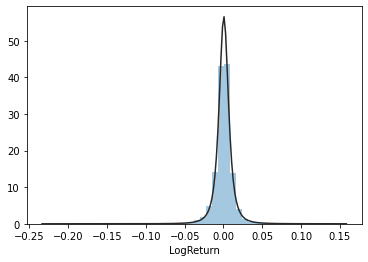

In [ ]:
sns.distplot(snpData['LogReturn'][1:], fit=stats.t, kde=False)

In [ ]:
Tfit =stats.t.fit(snpData['LogReturn'][1:])

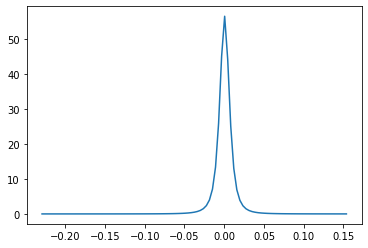

In [ ]:
plt.plot(bins,stats.t.pdf(bins,Tfit[0],Tfit[1],Tfit[2]));